# < Decision Tree >

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
# == from matplotlib import pyplot

from sklearn import tree
import numpy as np

In [2]:
df = pd.read_csv("D:/2022 2기/1. 월/기계학습 프로그래밍/ai_score_data.csv")

In [4]:
df.shape

(23, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     23 non-null     object
 1   id       23 non-null     object
 2   Sex      23 non-null     object
 3   Korean   23 non-null     int64 
 4   English  23 non-null     int64 
 5   Math     23 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.2+ KB


In [6]:
df.describe()
# mean 평균과 50% 중간값은 달라.
# 학생 22명의 나이 중간값은 11명이 포함되는 그 지점

,Korean,English,Math
count,23.000000,23.000000,23.000000
mean,42.304348,54.695652,55.260870
std,32.569415,30.748887,23.922636
min,2.000000,0.000000,8.000000
25%,16.000000,34.500000,46.000000
50%,42.000000,50.000000,53.000000
75%,58.000000,82.500000,70.000000
max,99.000000,100.000000,100.000000


# 데이터 접근해보기

In [10]:
# 평균
df["Math"].mean()

55.26086956521739

In [11]:
# 중간값
df["Math"].median()

53.0

In [12]:
# 표준 편차
df.Math.std()

23.922635517822382

In [13]:
# 상관관계
df.corr()

,Korean,English,Math
Korean,1.000000,-0.231335,-0.044386
English,-0.231335,1.000000,0.082112
Math,-0.044386,0.082112,1.000000


In [15]:
# 상관관계
df[['Korean', 'English']].corr()

,Korean,English
Korean,1.000000,-0.231335
English,-0.231335,1.000000


# Matplotlib

## hist 함수의 인자로 dataFrame의 col을 넘겨줌

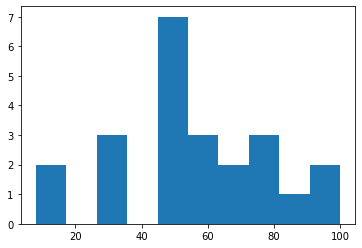

In [17]:
plt.hist(df.Math)
plt.show()

## 그래프 그리기

(array([2., 0., 0., 0., 2., 1., 0., 0., 4., 3., 2., 1., 2., 0., 1., 2., 0.,
        1., 1., 1.]),
 array([  8. ,  12.6,  17.2,  21.8,  26.4,  31. ,  35.6,  40.2,  44.8,
         49.4,  54. ,  58.6,  63.2,  67.8,  72.4,  77. ,  81.6,  86.2,
         90.8,  95.4, 100. ]),
 <BarContainer object of 20 artists>)

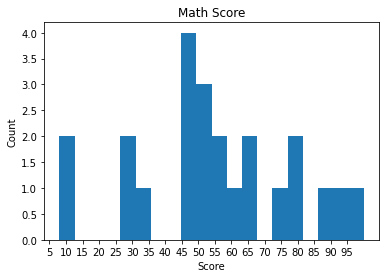

In [23]:
plt.title("Math Score")  # 제목

plt.xlabel('Score')  # x축 label
plt.xticks(range(0, df.Math.max(), 5))  # 범위, step
plt.ylabel('Count')  # y축 label

plt.hist(df.Math, bins=20)  # 히스토그램 구간. 전체를 20개의 주머니로 나누어라

(array([ 2.,  3., 10.,  5.,  3.]),
 array([  8. ,  26.4,  44.8,  63.2,  81.6, 100. ]),
 <BarContainer object of 5 artists>)

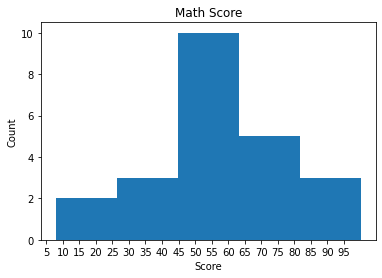

In [24]:
plt.title("Math Score")  # 제목

plt.xlabel('Score')  # x축 label
plt.ylabel('Count')  # y축 label

plt.xticks(range(0, df.Math.max(), 5))  # 범위, step

plt.hist(df.Math, bins=5)  # 히스토그램 구간. 전체를 5개의 주머니로 나누어라

## 산점도 scatter plot

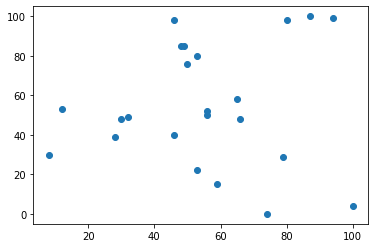

In [25]:
plt.scatter(df.Math, df.English)
plt.show()

### 그래프 꾸미기

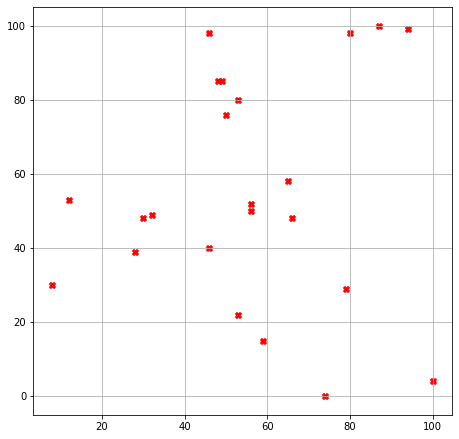

In [33]:
plt.figure(figsize=(7.5, 7.5))  # 이미지 크기 조절
plt.grid()  # 격자 조절

plt.scatter(df.Math, df.English, 
            color='red',
           marker='X')
plt.show()

In [30]:
# # 0 위치 바꾸기
# plt.figure(figsize=(7.5, 7.5))  # 이미지 크기 조절
# plt.grid()  # 격자 조절

# plt.yticks(range(0, 100, 10))

# plt.scatter(df.Math, df.English, 
#             color='red',
#            marker='X')
# plt.show()

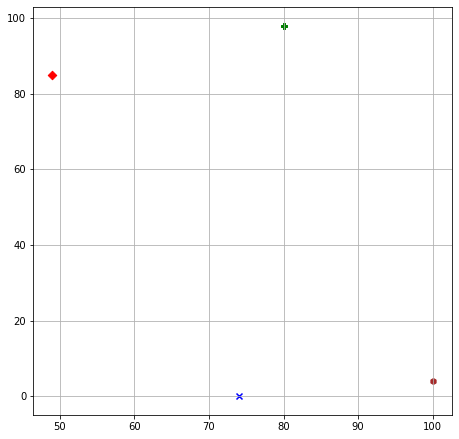

In [38]:
# 점 하나씩 접근해보기
plt.figure(figsize=(7.5, 7.5))  # 이미지 크기 조절
plt.grid()  # 격자 조절

plt.scatter(df.loc[0,'Math'], df.loc[0, 'English'], 
            color='red',
           marker='D')
plt.scatter(df.loc[1,'Math'], df.loc[1, 'English'], 
            color='green',
           marker='P')
plt.scatter(df.loc[2,'Math'], df.loc[2, 'English'], 
            color='brown',
           marker='h')
plt.scatter(df.loc[3,'Math'], df.loc[3, 'English'], 
            color='blue',
           marker='x')

plt.show()

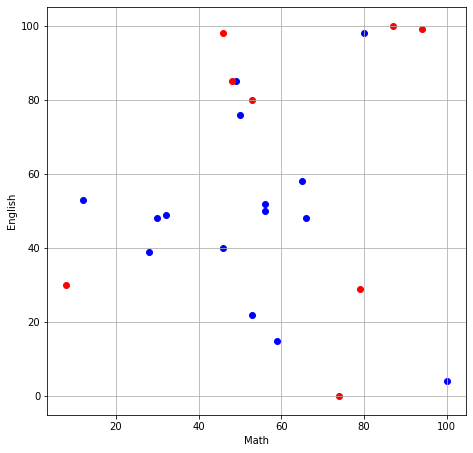

In [34]:
# 남녀 구분하기
plt.figure(figsize=(7.5, 7.5))  # 이미지 크기 조절
plt.grid()  # 격자 조절

plt.xlabel('Math')  # x축 label
plt.ylabel('English')  # y축 label

for i in range(len(df["Sex"])):
    if df.loc[i, "Sex"] == "M":
        plt.scatter(df.loc[i, "Math"], df.loc[i, "English"], color="blue")
    else:
        plt.scatter(df.loc[i, "Math"], df.loc[i, "English"], color="red")
        
plt.show()

# Decision Tree in sklean.tree

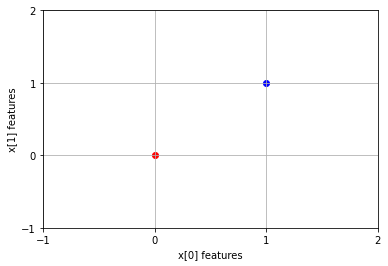

In [42]:
x = [[0, 0], [1, 1]]
y = [0, 1]

for i in range(len(x)):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1], color='red')
    else:
        plt.scatter(x[i][0], x[i][1], color='blue')


plt.xlabel('x[0] features')  # x축 label
plt.ylabel('x[1] features')  # y축 label

plt.xticks(np.arange(-1, 3, 1))  # 범위, step
plt.yticks(np.arange(-1, 3, 1))  # 범위, step

plt.grid()
plt.show()

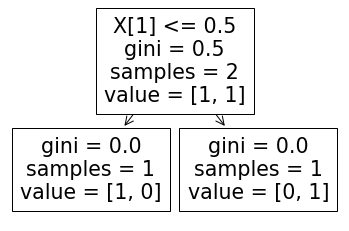

In [45]:
dtree = tree.DecisionTreeClassifier()
# dtree = dtree.fit(x, y)
dtree.fit(x, y)

tree.plot_tree(dtree)
plt.show()

# value = [ ] 클래스 값 기반의 데이터 건수 
# value = [1, 0] : 클래스0인 것이 1개, 1인 것이 0개

## 연어 배스 분류기

In [46]:
df = pd.read_csv('D:/2022 2기/1. 월/기계학습 프로그래밍/salmon_bass_data.csv')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Class      318 non-null    object 
 1   Length     318 non-null    int64  
 2   Lightness  318 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.6+ KB


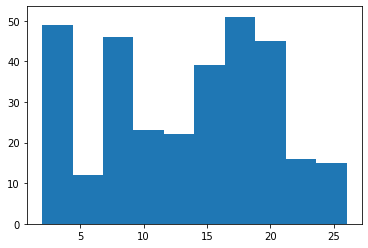

In [48]:
plt.hist(df.Length)
plt.show()

## class별로 나누어 그려보기

In [49]:
salmon = df.loc[df["Class"] == 'Salmon']
bass = df.loc[df["Class"] == 'Bass']

In [52]:
salmon

,Class,Length,Lightness
0,Salmon,2,0.8
1,Salmon,2,0.8
2,Salmon,2,1.2
3,Salmon,2,1.2
4,Salmon,2,1.2
...,...,...,...
163,Salmon,25,2.0
164,Salmon,25,2.0
165,Salmon,25,2.0
166,Salmon,26,1.2


In [53]:
bass

,Class,Length,Lightness
168,Bass,3,3.6
169,Bass,3,4.0
170,Bass,3,4.4
171,Bass,3,4.4
172,Bass,4,4.4
...,...,...,...
313,Bass,24,6.8
314,Bass,24,6.8
315,Bass,24,6.8
316,Bass,24,6.8


### 길이 기준으로 분류

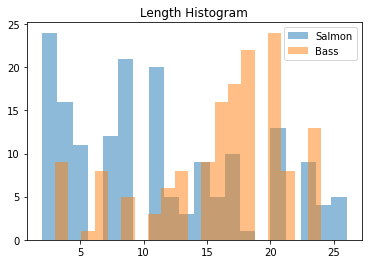

In [54]:
plt.title('Length Histogram')

# alpha : 투명도
plt.hist(salmon.Length, bins=20, alpha=0.5, label='Salmon')
plt.hist(bass.Length, bins=20, alpha=0.5, label='Bass')

plt.legend(loc='best')  # loc='best' : 범례를 알아서 제일 좋은 자리에 갖다 둠
plt.show()

### 밝기 기준으로 분류

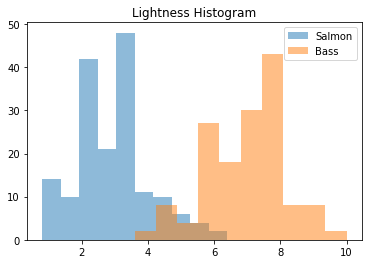

In [58]:
plt.title('Lightness Histogram')

# alpha : 투명도
plt.hist(salmon.Lightness, bins=10, alpha=0.5, label='Salmon')
plt.hist(bass.Lightness, bins=10, alpha=0.5, label='Bass')

plt.legend(loc='best')  # loc='best' : 범례를 알아서 제일 좋은 자리에 갖다 둠
plt.show()

## salmon, bass 분류

In [59]:
x = []  # 특징값 [길이, 밝기]를 넣어줄 벡터
y = []  # 타겟값을 저장할 벡터

for i in range(len(df)):
    fish = [df.loc[i, "Length"], df.loc[i, "Lightness"]]
    x.append(fish)
    y.append(df.loc[i, "Class"])

In [64]:
# 학습
# classifier 는 DTree
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(x, y)

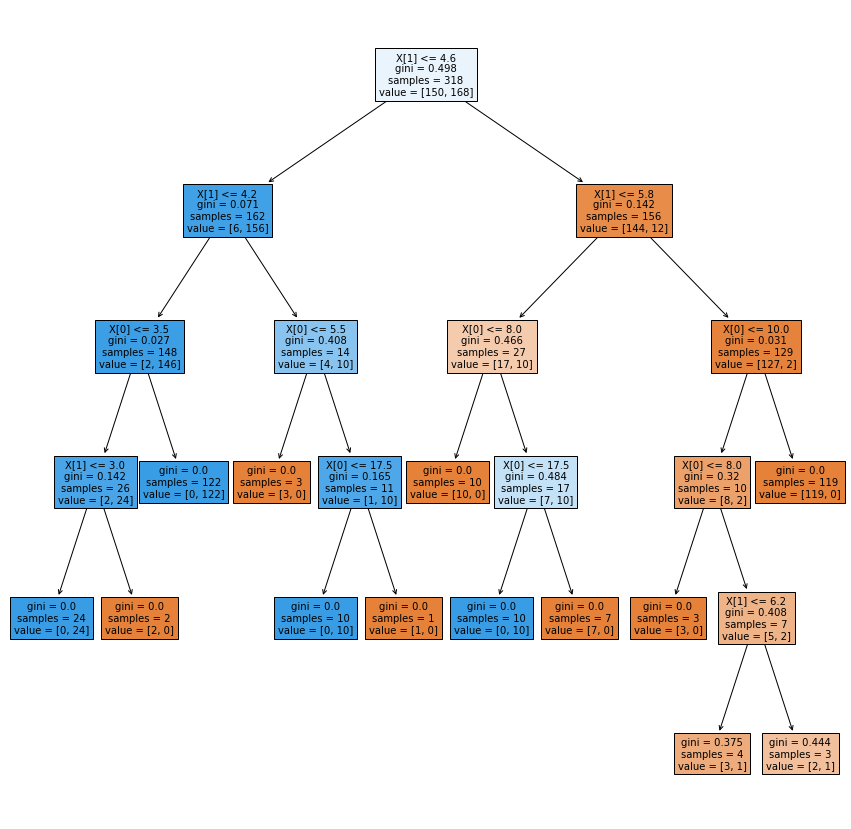

In [78]:
plt.figure(figsize=(15, 15))
tree.plot_tree(dtree, fontsize=10, filled=True)  # filled=True는  색깔 채워줌
# tree.plot_tree(dtree, fontsize=10)
plt.show()

## 가지치기 및 옵션 추가
- 끝까지 나누는게 마냥 좋은 게 아닐 수 있음 : 오버피팅, 시간 문제 등

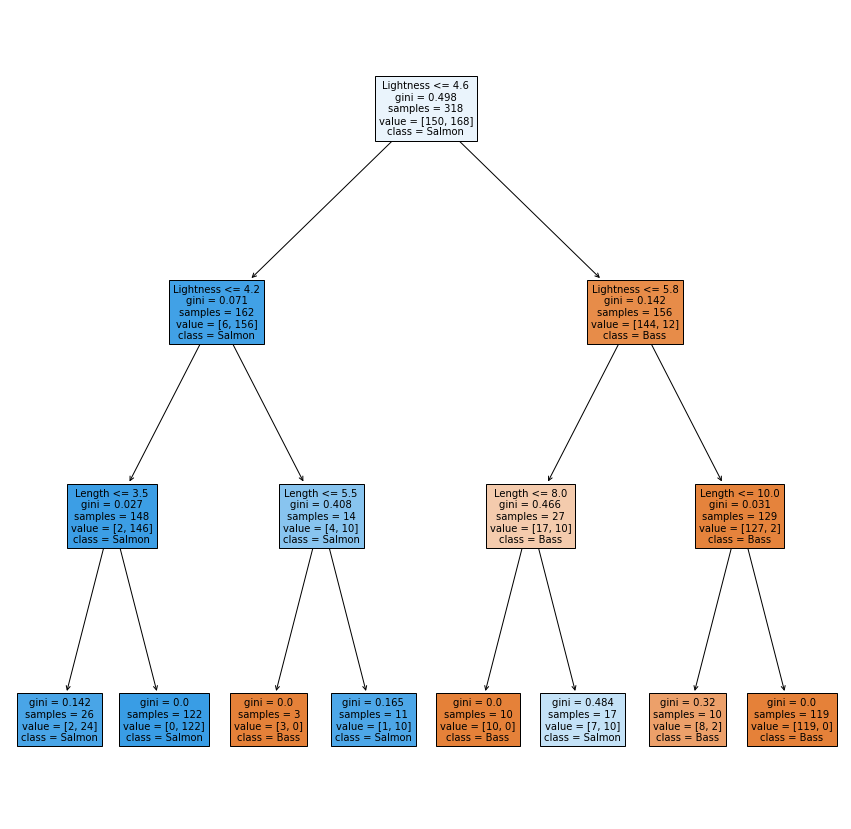

In [87]:
dtree = tree.DecisionTreeClassifier(max_depth=3)
dtree = dtree.fit(x, y)

plt.figure(figsize=(15, 15))
tree.plot_tree(dtree, fontsize=10, filled=True,
              class_names=['Salmon', "Bass"],  # pf.K
              # class_names=['Bass', "Salmon"],   # mine
              feature_names=['Length', "Lightness"])
plt.show()